Problem Statement
The aim of the project is to predict the Technical Efficiency of ship based on various factors such as Ship Type,Technical Efficiency,Total Fuel Consumption,Total CO2 emission,,Annual Time Spent at the sea,Distance Travelled by the ship,etc.
Tech

At first i will answer the question that why i have choosen Technical efficiency of the ship as output variable.
Understanding the technical efficiency of a ship is crucial for several reasons:

Cost Savings: Ships with higher technical efficiency consume less fuel for the same amount of work, resulting in lower operating costs.

Environmental Impact: Highly efficient ships produce fewer emissions per unit of work, reducing their environmental impact, including greenhouse gas emissions and air pollutants.

Compliance with Regulations: Many regulations and agreements, such as the International Maritime Organization's (IMO) regulations, aim to reduce greenhouse gas emissions from ships. Understanding a ship's technical efficiency is essential for compliance with these regulations.

Competitive Advantage: Efficient ships have a competitive advantage in the market. They can offer lower operating costs, better environmental performance, and potentially faster delivery times.

 Risk Management: Assessing a ship's technical efficiency helps identify areas for improvement and reduces the risk of unexpected breakdowns or performance issues.

Resource Allocation: Information about a ship's technical efficiency helps in making informed decisions about investments in maintenance, upgrades, or new technology to improve efficiency.

Long-Term Sustainability: Improving the technical efficiency of ships contributes to the long-term sustainability of the shipping industry by reducing its environmental footprint and dependence on fossil fuels.

Overall, having information about the technical efficiency of a ship is essential for reducing costs, minimizing environmental impact, complying with regulations, and maintaining competitiveness in the shipping industry.
Due to all these importance i have chosen technical efficiency as output parameter.

Dataset contain followung columns.
Ship type  
There are mainly 15 types of ships.
'Passenger ship''Ro-pax ship' 'Ro-ro ship'  'Other ship types' 
 'Bulk carrier' 'General cargo ship' 'Chemical tanker' 'Container ship'
 'Refrigerated cargo carrier' 'Vehicle carrier' 'Gas carrier'
 'Container/ro-ro cargo ship' 'LNG carrier' 'Oil tanker'
 'Combination carrier'
 
Technical efficiency (in gCO₂/t·nm)

Total fuel consumption [m tonnes](metric tonnes)  

Total CO₂ emissions [m tonnes]  (metric tonnes)    

CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes] (metric tonnes)  

CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes] (metric tonnes)    

CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]   (metric tonnes)        

CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]    (metric tonnes)     

Annual Time spent at sea [hours]                 

Annual average Fuel consumption per distance [kg / n mile] 

Annual average CO₂ emissions per distance [kg CO₂ / n mile] 

Distance Travelled by Ship( Thousand nmiles)   

Steps performed below:
1. Reading ,Understanding, and visualising the data.
2. Preparing the data for modelling.
3. Building the model.
4. Evaluation of model.

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_3192\871874669.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


EXPLORATORY DATA ANALYSIS

Reading and understanding the data.

In [2]:
df = pd.read_csv("emission.csv")
df.head()

Ship type  Technical efficiency  Total fuel consumption [m tonnes]  \
0    Passenger ship                 31.75                            3473.74   
1  Other ship types                 57.84                             722.50   
2       Ro-pax ship                 19.40                            2509.00   
3        Ro-ro ship                 48.71                            2776.01   
4       Ro-pax ship                 50.15                            3233.44   

   Total CO₂ emissions [m tonnes]  \
0                        11071.53   
1                         2289.71   
2                         8043.85   
3                         8789.82   
4                        10366.39   

   CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]  \
0                                            8143.43                                           
1                                              89.00                                           
2                                               0.00                                           
3                                            8321.74                                           
4                                           10366.39                                           

   CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]  \
0                                            1098.95                                                                        
1                                             997.00                                                                        
2                                            3365.23                                                                        
3                                               0.00                                                                        
4                                               0.00                                                                        

   CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]  \
0                                             946.93                                        
1                                            1108.00                                        
2                                            3813.00                                        
3                                               0.00                                        
4                                               0.00                                        

   CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]  \
0                                             882.22                                                             
1                                              96.00                                                             
2                                             865.62                                                             
3                                             468.08                                                             
4                                               0.00                                                             

   Annual Time spent at sea [hours]  \
0                           2346.25   
1                           1324.00   
2                           2207.00   
3                           3635.00   
4                           2492.00   

  Annual average Fuel consumption per distance [kg / n mile]  \
0                                             104.75           
1                                               58.5           
2                                              84.95           
3                                              63.38           
4                                              94.85           

  Annual average CO₂ emissions per distance [kg CO₂ / n mile]  \
0                                             333

In [3]:
#Number of Rows and columns.
df.shape

(12708, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708 entries, 0 to 12707
Data columns (total 12 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Ship type                                                                                                               12708 non-null  object 
 1   Technical efficiency                                                                                                    12484 non-null  float64
 2   Total fuel consumption [m tonnes]                                                                                       12708 non-null  float64
 3   Total CO₂ emissions [m tonnes]                                                                                          12708 non-null  float

In [5]:
#Need to convert Ship type to integer values.
from sklearn.preprocessing import LabelEncoder
column_to_encode = ['Ship type']
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in column_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [8]:
#I need to convert all the objects to float value or integer value.
df['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(df['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = pd.to_numeric(df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'], errors='coerce')

df['Total fuel consumption [m tonnes]'] = pd.to_numeric(df['Total fuel consumption [m tonnes]'], errors='coerce')
df['Total CO₂ emissions [m tonnes]'] = pd.to_numeric(df['Total CO₂ emissions [m tonnes]'], errors='coerce')
df['Technical efficiency'] = pd.to_numeric(df['Technical efficiency'], errors='coerce')
df['Distance Travelled by Ship(nmiles in thousands)'] = pd.to_numeric(df['Distance Travelled by Ship(nmiles in thousands)'], errors='coerce')
print(df.dtypes)


Ship type                                                                                                                   int32
Technical efficiency                                                                                                      float64
Total fuel consumption [m tonnes]                                                                                         float64
Total CO₂ emissions [m tonnes]                                                                                            float64
CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]                                 float64
CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]    float64
CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]                                    float64
CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at

In [9]:
df.describe()

Ship type  Technical efficiency  Total fuel consumption [m tonnes]  \
count  12708.000000          12484.000000                       12708.000000   
mean       4.192241              9.958392                        3374.054528   
std        4.191390              7.994869                        4287.029623   
min        0.000000              0.000000                           0.000000   
25%        0.000000              4.280000                        1017.220000   
50%        3.000000              6.700000                        1929.210000   
75%        8.000000             13.665000                        3769.200000   
max       14.000000             64.900000                       42759.000000   

       Total CO₂ emissions [m tonnes]  \
count                    12708.000000   
mean                     10477.833968   
std                      13175.173247   
min                          0.000000   
25%                       3197.197500   
50%                       6055.450000   
75%                      11798.012500   
max                     133812.360000   

       CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]  \
count                                       12708.000000                                           
mean                                         2738.512823                                           
std                                          7867.660680                                           
min                                             0.000000                                           
25%                                             0.000000                                           
50%                                           426.315000                                           
75%                                          1779.722500                                           
max                                        117846.780000                                           

       CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]  \
count                                       12708.000000                                                                        
mean                                         3392.849011                                                                        
std                                          4945.102201                                                                        
min                                             0.000000                                                                        
25%                                           784.465000                                                                        
50%                                          1813.810000                                                                        
75%                                          3718.997500                                                                        
max                                         48664.600000                                                                        

       CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]  \
count                                       12708.000000                                        
mean                                         3674.743800                                        
std                                          4943.478714                                        
min                                             0.000000                                        
25%                                          1000.545000                                        
50%                                          2173.265000                                        
75%                                          4233.922500                                        
max                                         47740.780000                        

Handling Missing Values in columns

In [10]:
columns_to_check = ['Total fuel consumption [m tonnes]', 'Total CO₂ emissions [m tonnes]','Technical efficiency','Annual average Fuel consumption per distance [kg / n mile]','Annual average CO₂ emissions per distance [kg CO₂ / n mile]']
df[columns_to_check] = df[columns_to_check].replace(0, pd.NA)

# Drop rows containing NaN in the specific columns
df.dropna(subset=columns_to_check, inplace=True)

In [11]:
df.shape

(12285, 12)

In [15]:
#I need to convert all the objects to float value or integer value.
df['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(df['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = pd.to_numeric(df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'], errors='coerce')

df['Total fuel consumption [m tonnes]'] = pd.to_numeric(df['Total fuel consumption [m tonnes]'], errors='coerce')
df['Total CO₂ emissions [m tonnes]'] = pd.to_numeric(df['Total CO₂ emissions [m tonnes]'], errors='coerce')
df['Technical efficiency'] = pd.to_numeric(df['Technical efficiency'], errors='coerce')
df['Distance Travelled by Ship(nmiles in thousands)'] = pd.to_numeric(df['Distance Travelled by Ship(nmiles in thousands)'], errors='coerce')
print(df.dtypes)


Ship type                                                                                                                   int32
Technical efficiency                                                                                                      float64
Total fuel consumption [m tonnes]                                                                                         float64
Total CO₂ emissions [m tonnes]                                                                                            float64
CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]                                 float64
CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]    float64
CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]                                    float64
CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12285 entries, 0 to 12707
Data columns (total 12 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Ship type                                                                                                               12285 non-null  int32  
 1   Technical efficiency                                                                                                    12285 non-null  float64
 2   Total fuel consumption [m tonnes]                                                                                       12285 non-null  float64
 3   Total CO₂ emissions [m tonnes]                                                                                          12285 non-null  float64
 4

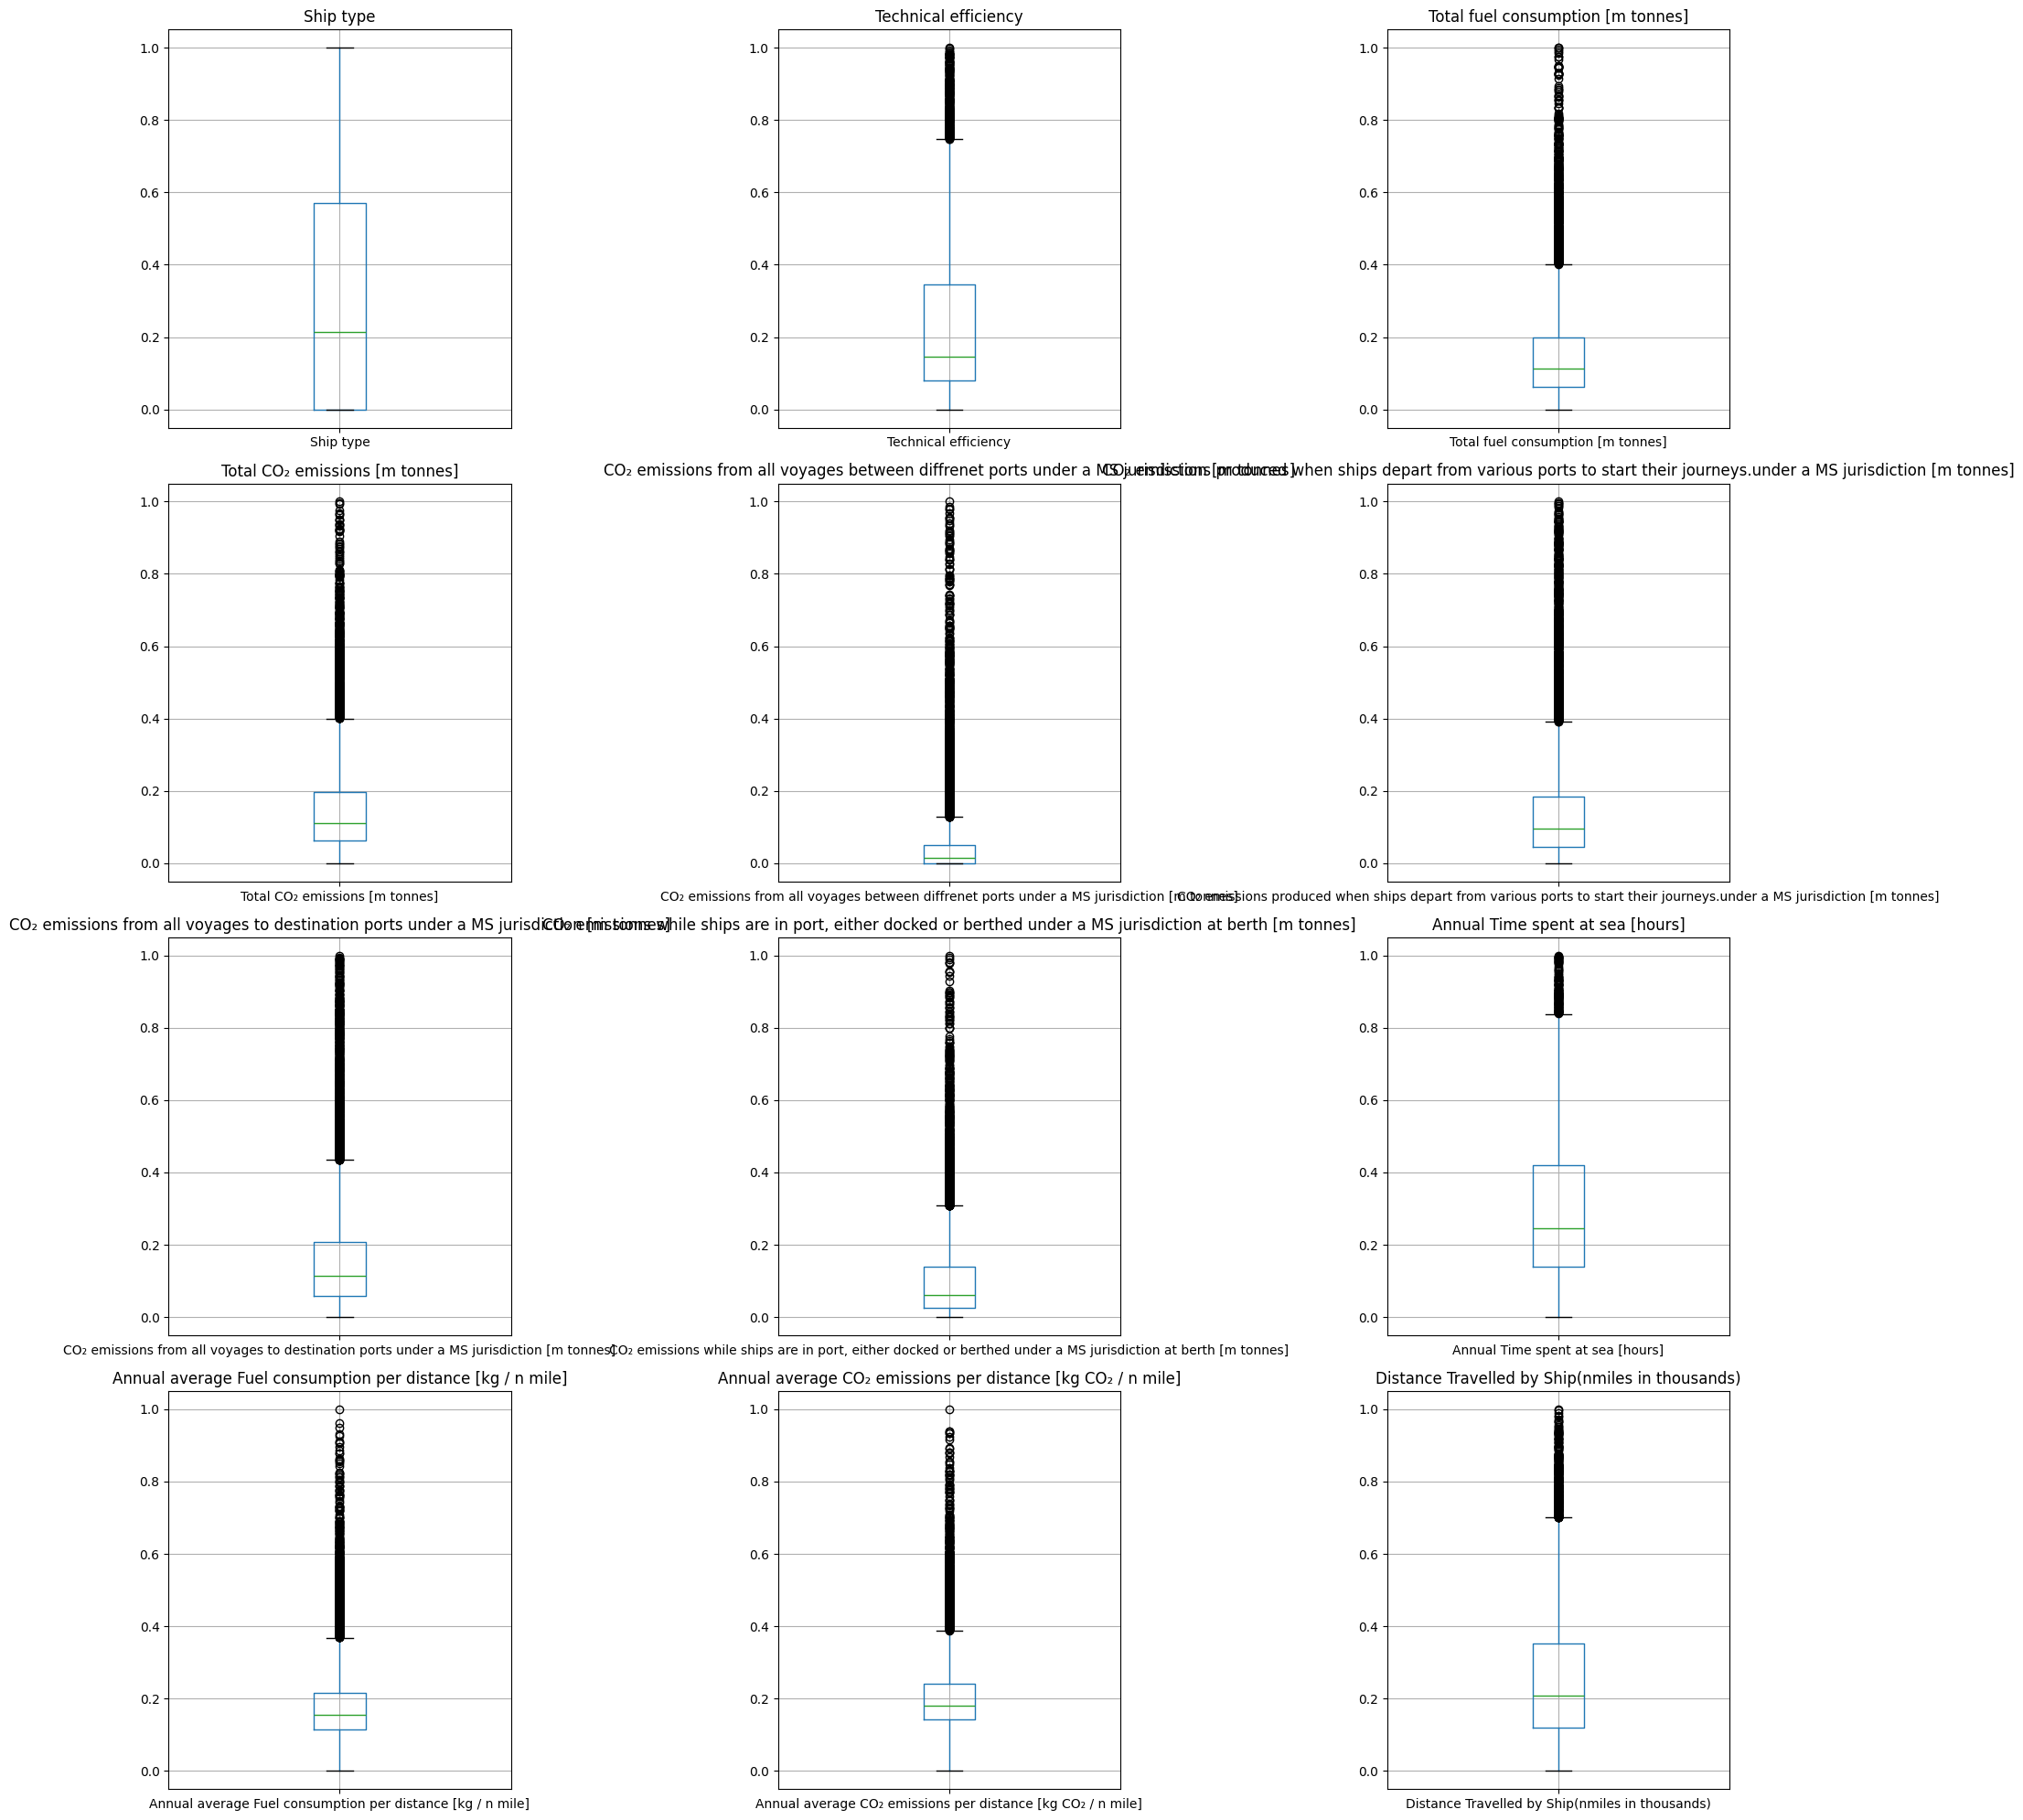

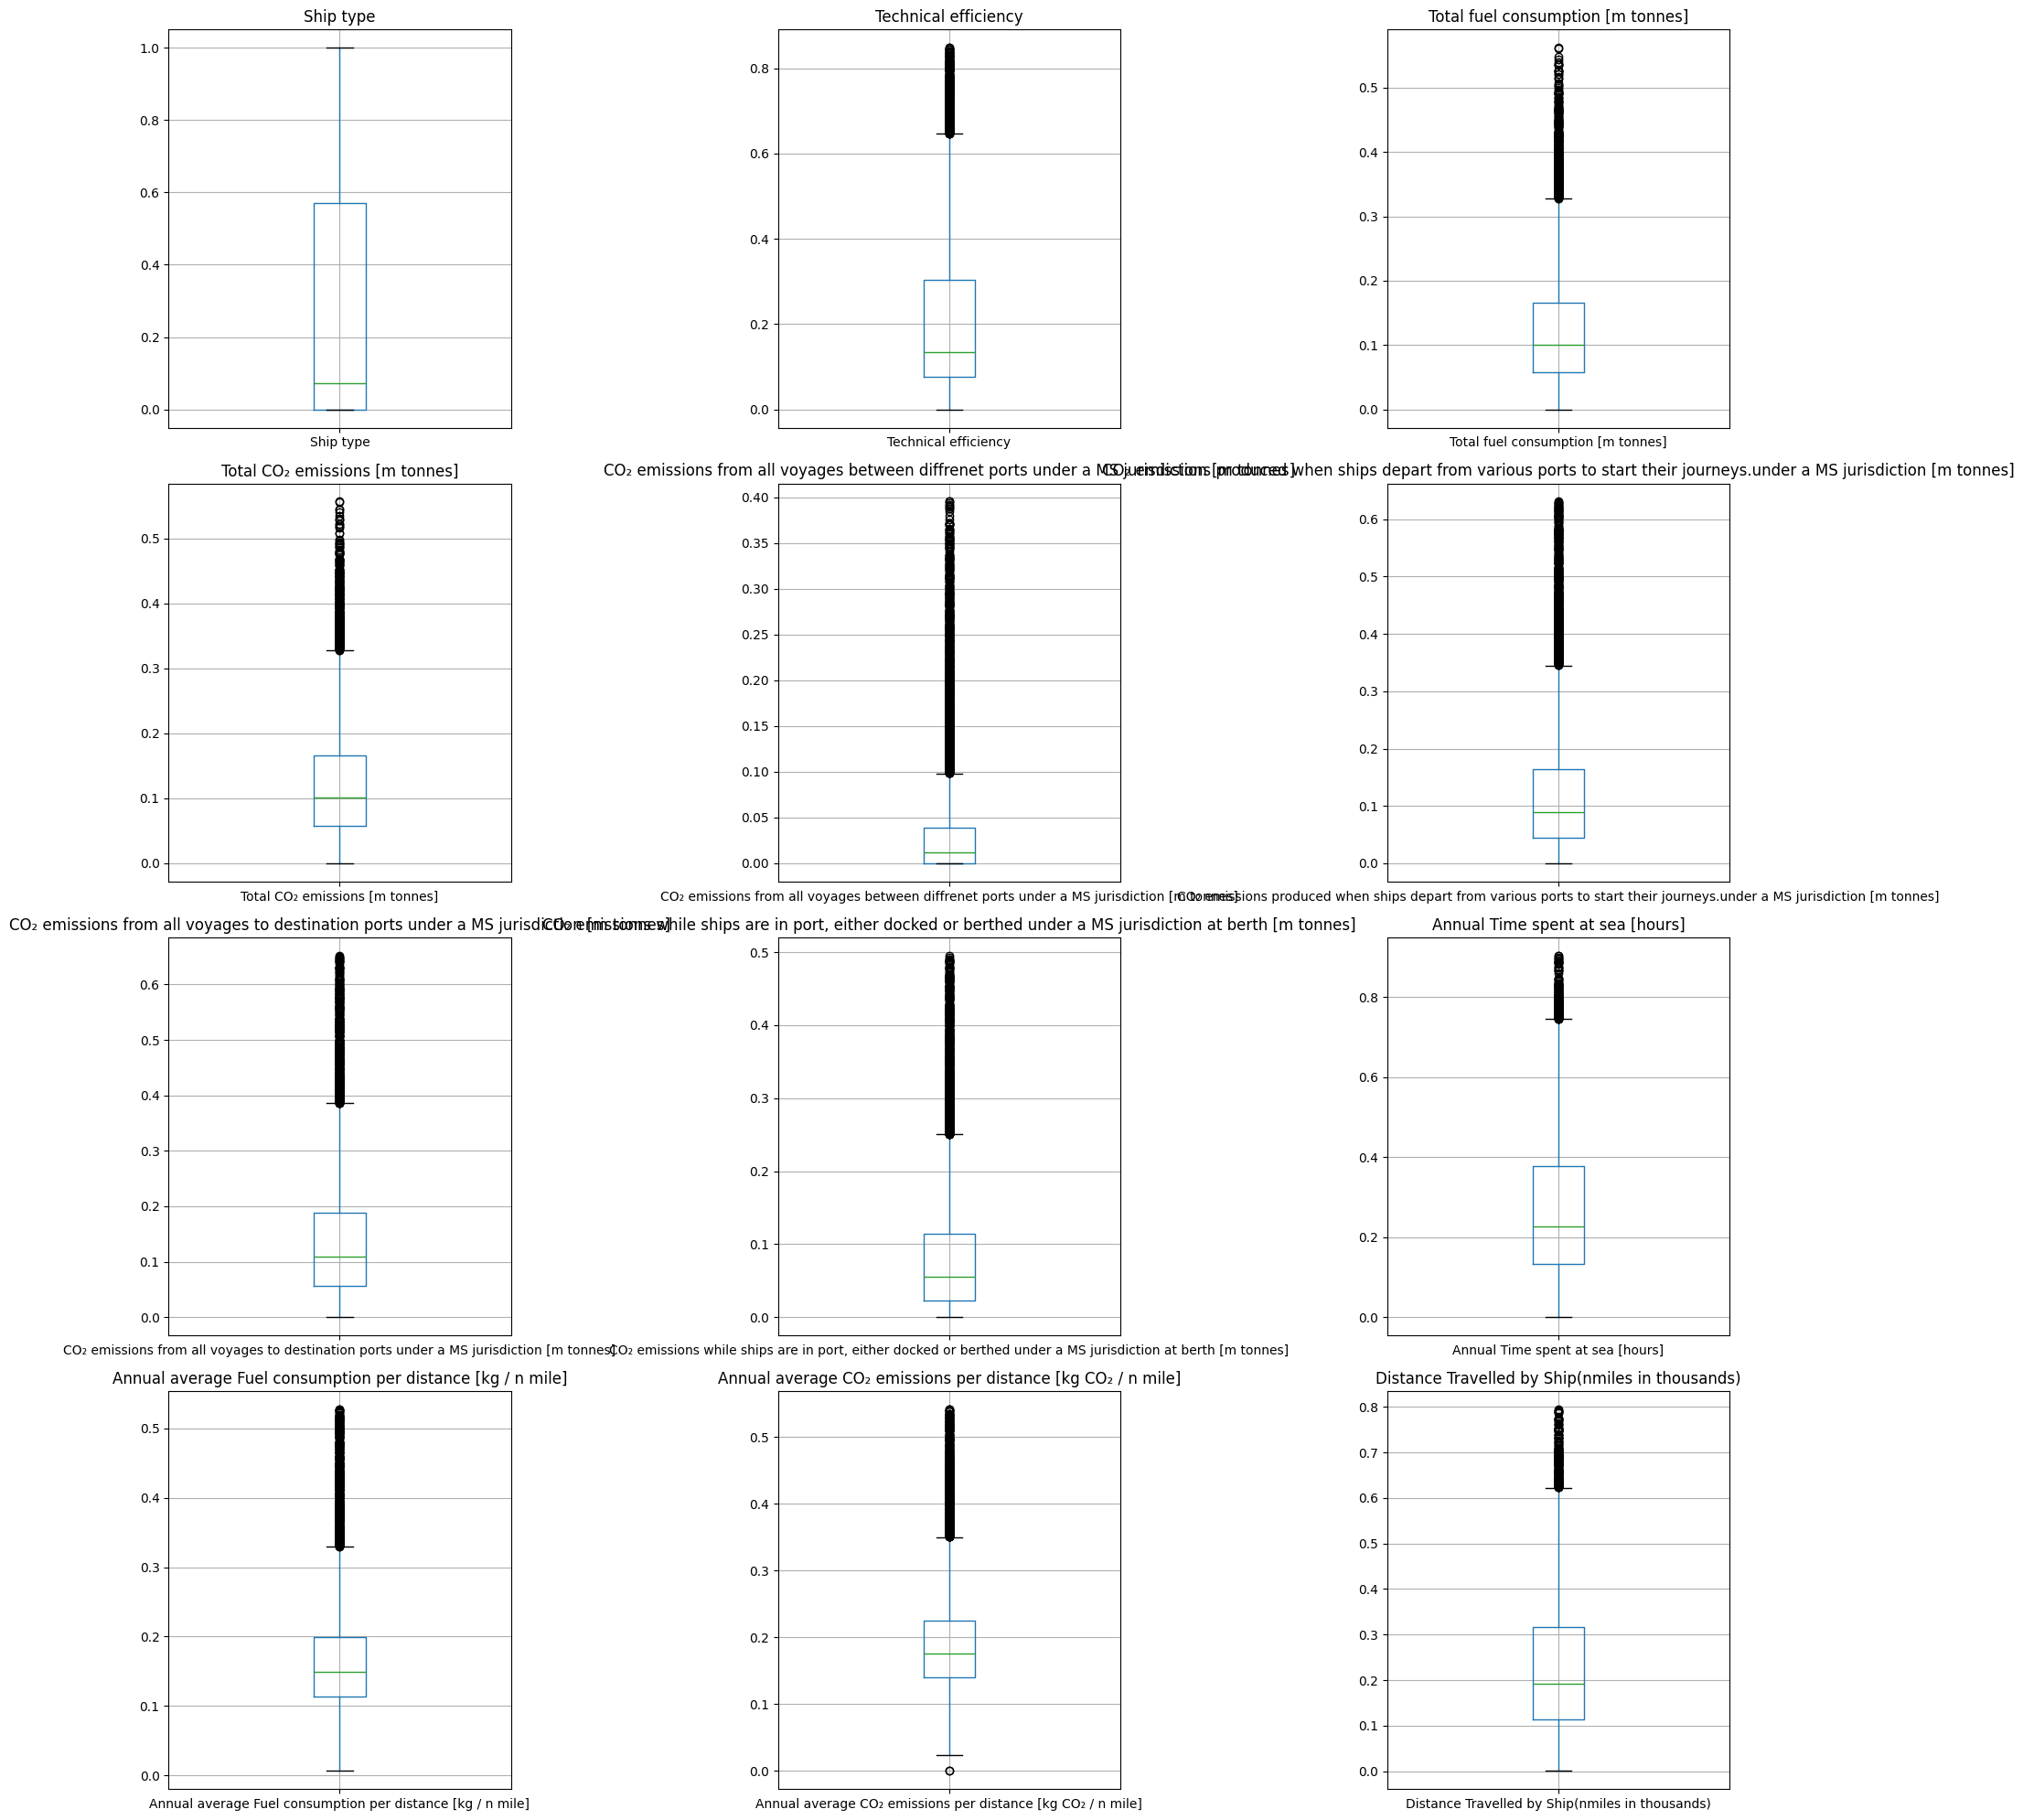

In [18]:
# Step 1: Identify Outliers
# Visualize your data to identify outliers

# Box plot for each column
plt.figure(figsize=(20, 20))
num_cols = len(df.columns)
num_rows = num_cols // 3 + (1 if num_cols % 3 > 0 else 0)
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1 )
    df.boxplot(column=[column])
    plt.title(column)
plt.tight_layout()
plt.show()
# Step 2: Handle Outliers
# Handle outliers using appropriate methods like Z-score or IQR
from scipy import stats

# Define a function to remove outliers using z-score
def remove_outliers_zscore(df, columns):
    z_scores = stats.zscore(df[columns])
    return df[(np.abs(z_scores) < 3).all(axis=1)]

# List of columns from which you want to remove outliers
columns_to_check = ['Technical efficiency', 'Total fuel consumption [m tonnes]','Total CO₂ emissions [m tonnes]','CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]','CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]','CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]','CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]','Annual Time spent at sea [hours]','Annual average Fuel consumption per distance [kg / n mile]','Annual average CO₂ emissions per distance [kg CO₂ / n mile]','Distance Travelled by Ship(nmiles in thousands)']

#Remove outliers from the specified columns
df_no_outliers = remove_outliers_zscore(df, columns_to_check)
df=df_no_outliers

# Box plot for each column
plt.figure(figsize=(20, 20))
num_cols = len(df.columns)
num_rows = num_cols // 3 + (1 if num_cols % 3 > 0 else 0)
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1 )
    df.boxplot(column=[column])
    plt.title(column)
plt.tight_layout()
plt.show()
# Step 3: Normalize Data
# Normalize your data
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns of the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df_normalized now contains all columns of df normalized
df = df_normalized

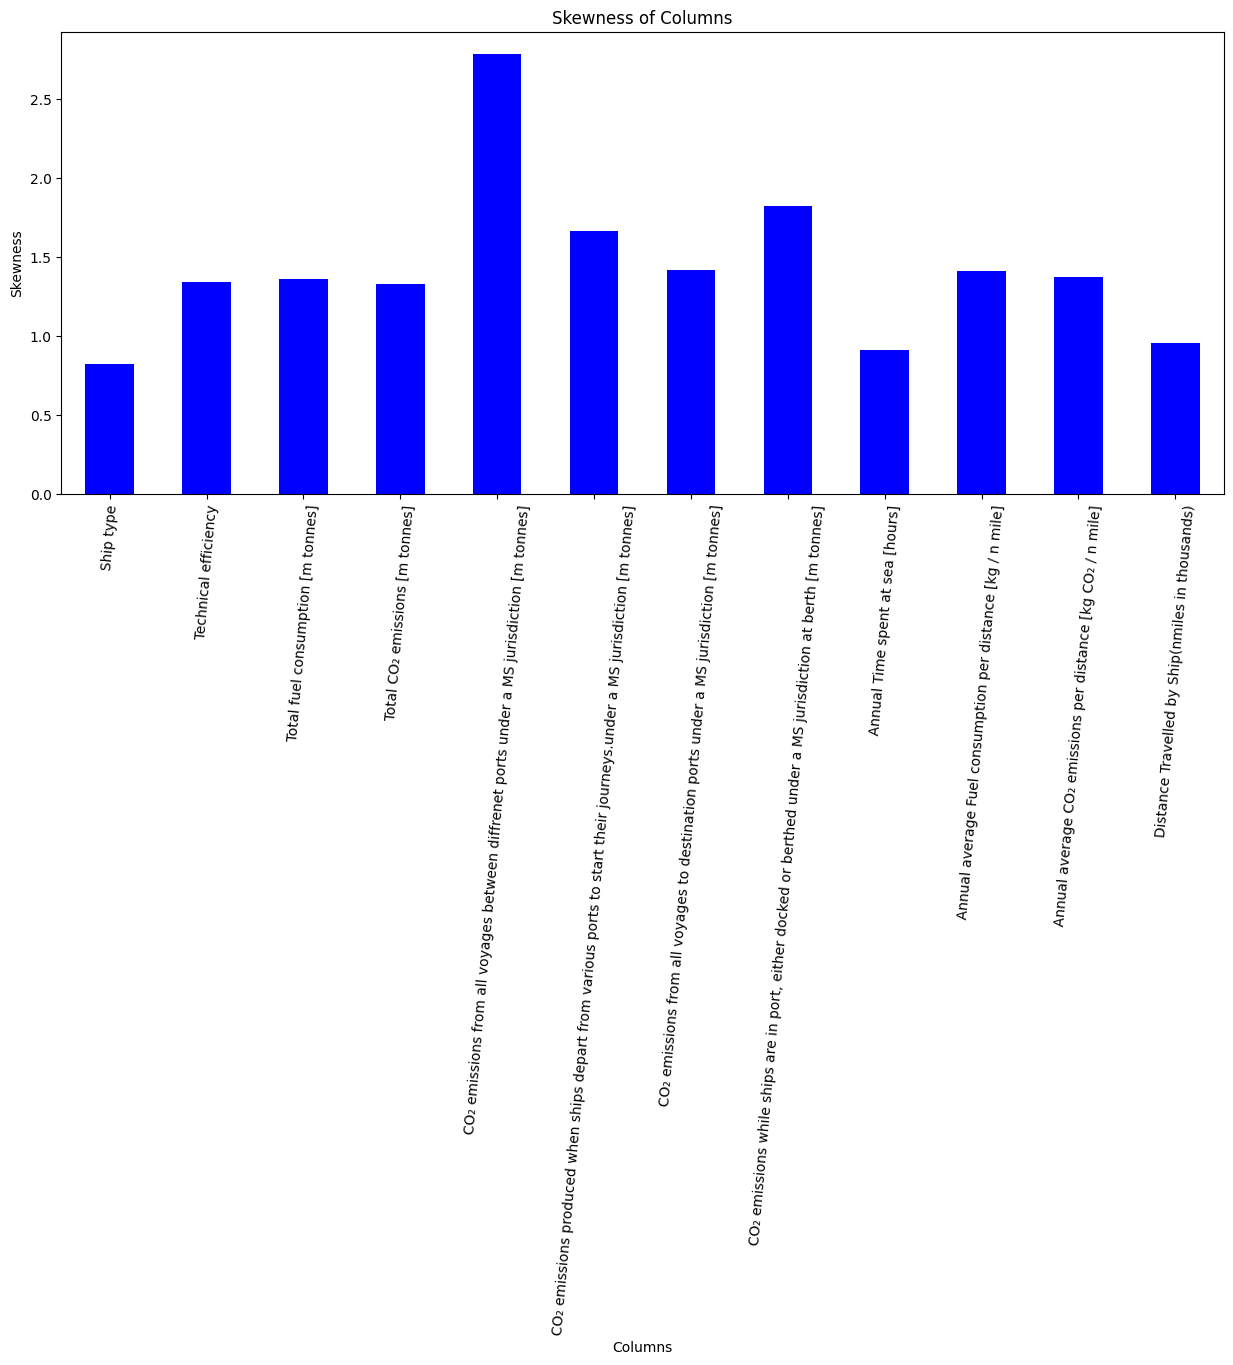

In [19]:
# Calculate skewness for each column
skewness = df.skew()

# Plot skewness for each column
plt.figure(figsize=(15, 6))
skewness.plot(kind='bar', color='blue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=85)
plt.show()


In [20]:
from scipy import stats

# Apply Box-Cox transformation to all columns
df_boxcox = df.apply(lambda x: stats.boxcox(x + 1)[0])
# Calculate skewness for each column
skewness_boxcox = df_boxcox.skew()

# Print skewness values
print(skewness_boxcox)
df=df_boxcox

Ship type                                                                                                                 0.240252
Technical efficiency                                                                                                      0.304528
Total fuel consumption [m tonnes]                                                                                         0.114061
Total CO₂ emissions [m tonnes]                                                                                            0.112021
CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]                                 0.630303
CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]    0.153802
CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]                                    0.113021
CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdic

The skewness values you provided indicate the degree of skewness in the variables after applying a Box-Cox transformation.

Here's what you should do based on the skewness values:

    Positive Skewness (> 0):
        For variables with positive skewness, the data is skewed to the right.
        To correct positive skewness, i have to  to transform the data to make it more symmetric. Common transformations include taking the square root, cube root, or logarithm of the data.

    Negative Skewness (< 0):
        For variables with negative skewness, the data is skewed to the left.
        To correct negative skewness, ihave to transform the data to make it more symmetric. Common transformations include taking the square, cube, or exponential of the data.

    Interpretation:
        If the absolute value of skewness is close to zero (|skewness| < 0.5), the distribution is approximately symmetric.
        If the absolute value of skewness is between 0.5 and 1, the distribution is moderately skewed.
        If the absolute value of skewness is greater than 1, the distribution is highly skewed.

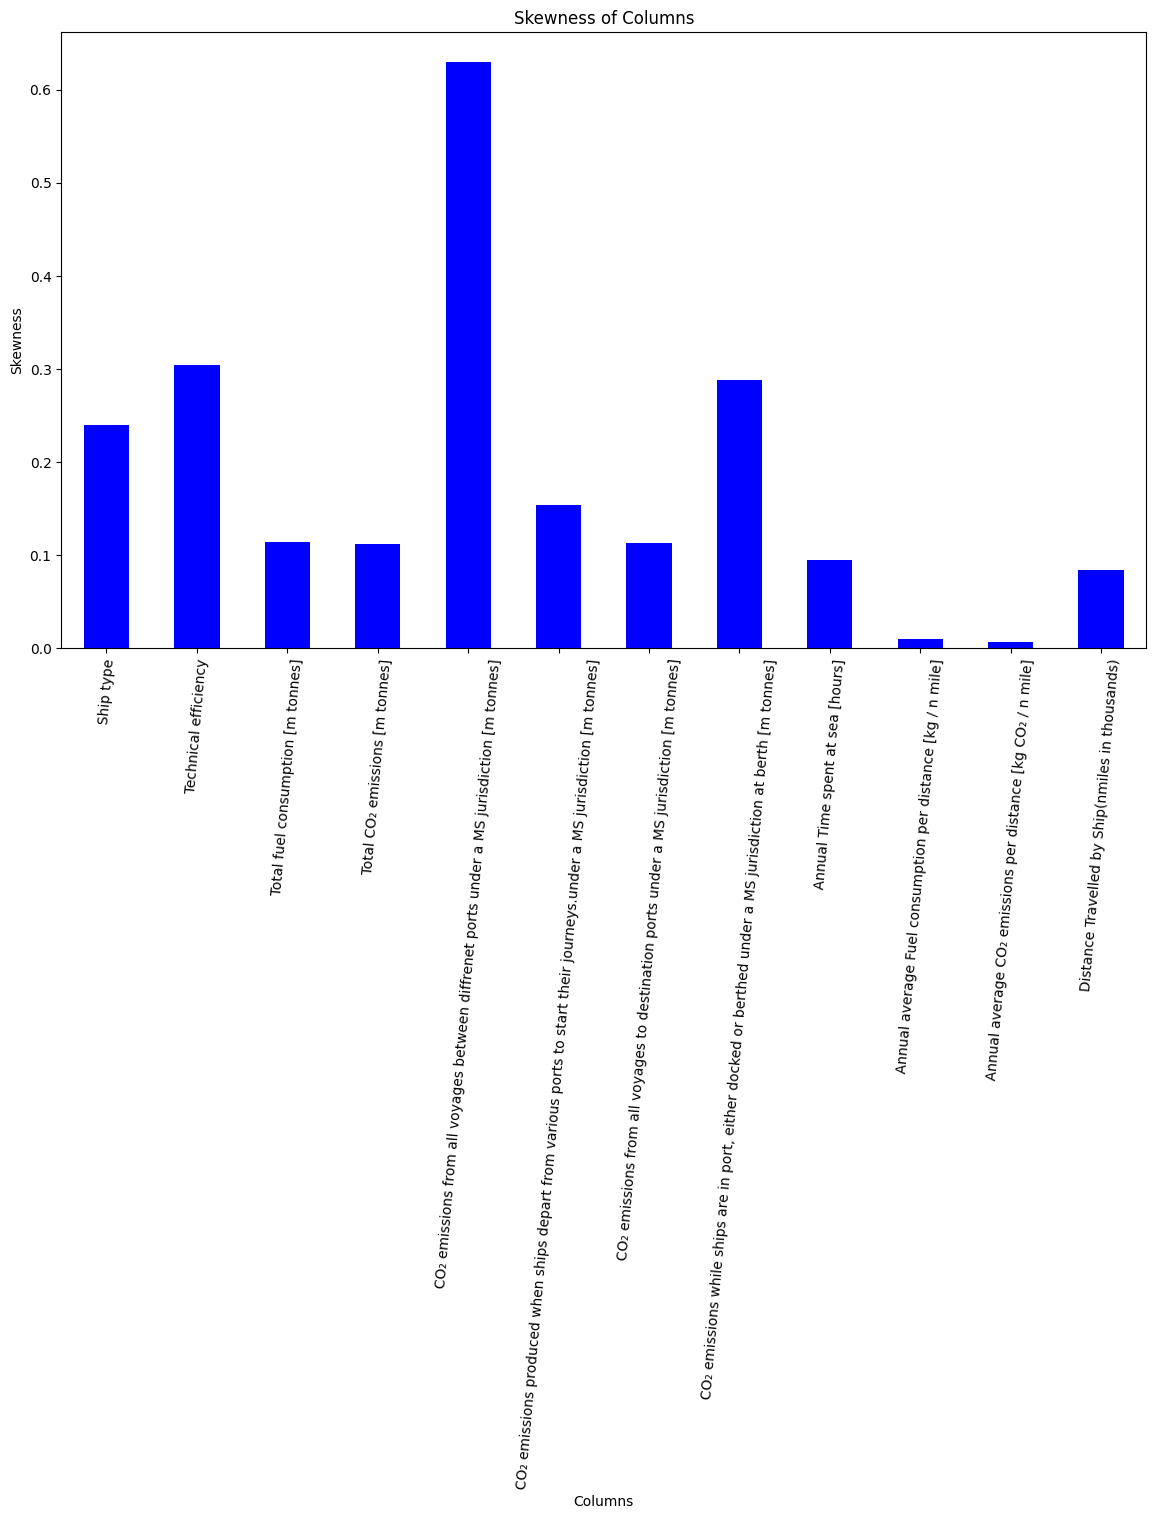

In [21]:
# Calculate skewness for each column
skewness = df.skew()

# Plot skewness for each column
plt.figure(figsize=(14, 8))
skewness.plot(kind='bar', color='blue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=85)
plt.show()


In [40]:
df=df.drop('Distance Travelled by Ship(nmiles in thousands)',axis=1)

In [41]:
Y=df[['Technical efficiency']]

In [42]:
X=df.drop('Technical efficiency',axis=1)
#nee dto use double brackets to take X and Y as dataframes.
X

Ship type  Total fuel consumption [m tonnes]  \
0       0.353923                           0.169229   
1       0.328938                           0.056623   
2       0.353923                           0.035166   
3       0.353923                           0.139345   
4       0.353923                           0.183285   
...          ...                                ...   
10013   0.064417                           0.142732   
10014   0.000000                           0.106502   
10015   0.000000                           0.086933   
10016   0.064417                           0.063133   
10017   0.296799                           0.055536   

       Total CO₂ emissions [m tonnes]  \
0                            0.172992   
1                            0.058530   
2                            0.036354   
3                            0.141023   
4                            0.186495   
...                               ...   
10013                        0.144815   
10014                        0.107369   
10015                        0.087613   
10016                        0.064369   
10017                        0.055977   

       CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]  \
0                                               0.000000                                           
1                                               0.081112                                           
2                                               0.011692                                           
3                                               0.102751                                           
4                                               0.104438                                           
...                                                  ...                                           
10013                                           0.048547                                           
10014                                           0.000000                                           
10015                                           0.000000                                           
10016                                           0.000000                                           
10017                                           0.000000                                           

       CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]  \
0                                               0.165453                                                                        
1                                               0.000000                                                                        
2                                               0.038754                                                                        
3                                               0.000000                                                                        
4                                               0.099957                                                                        
...                                                  ...                                                                        
10013                                           0.138565                                                                        
10014                                           0.153085                                                                        
10015                                           0.066077                                                                        
10016                                           0.000000                                                                        
10017                                           0.000000                                                                        

       CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]  \
0     

In [43]:
Y

Technical efficiency
0                  0.211840
1                  0.047417
2                  0.174231
3                  0.165928
4                  0.168577
...                     ...
10013              0.071717
10014              0.047694
10015              0.055001
10016              0.127667
10017              0.076346

[10018 rows x 1 columns]

In [44]:
#now test train split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
len(X_train)


8014

In [46]:
len(y_train)

8014

In [47]:
len(X_test)

2004

In [48]:
len(y_test)

2004

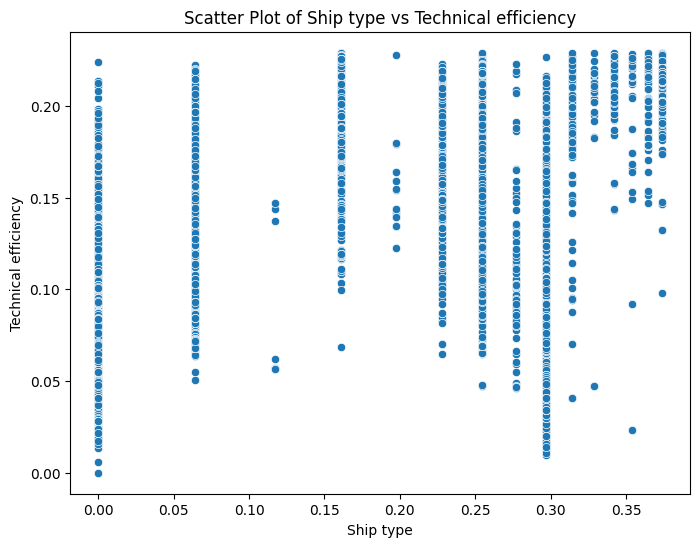

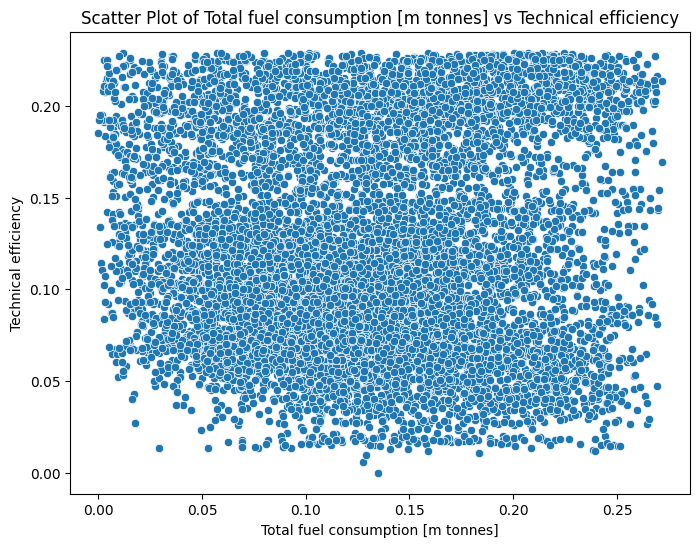

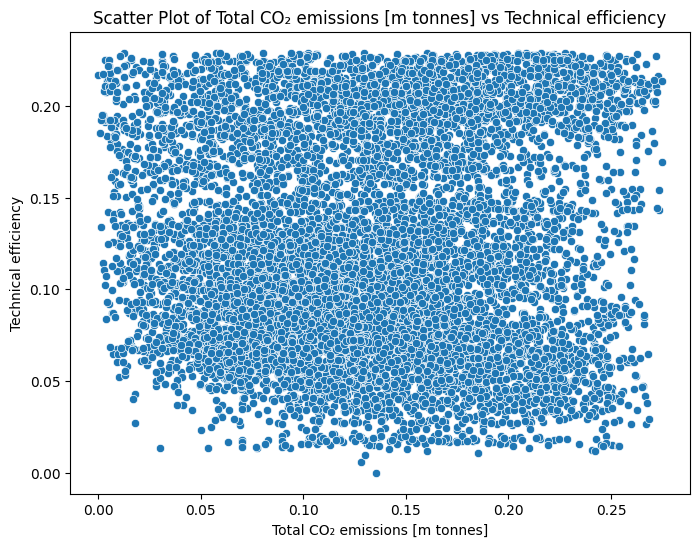

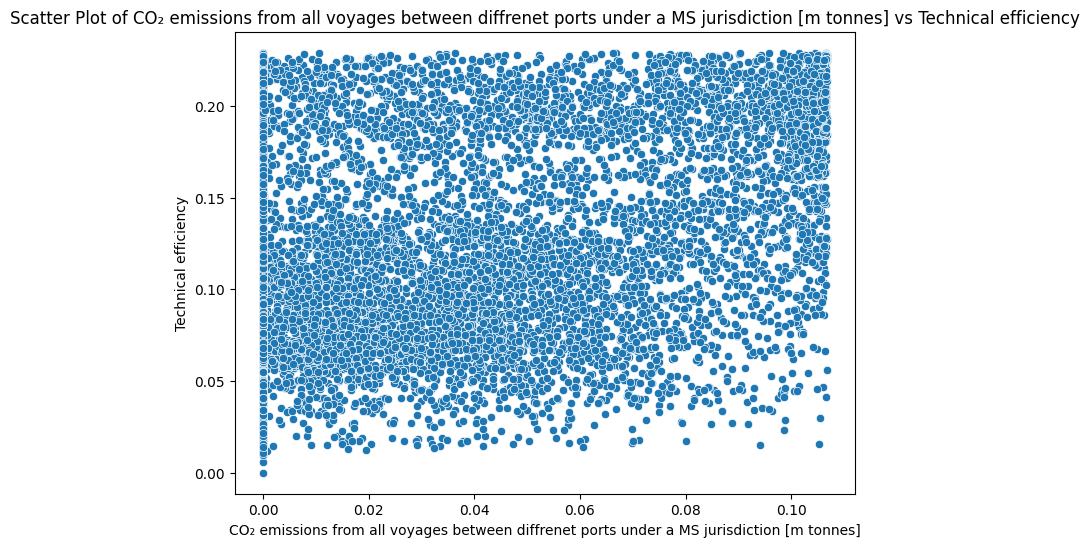

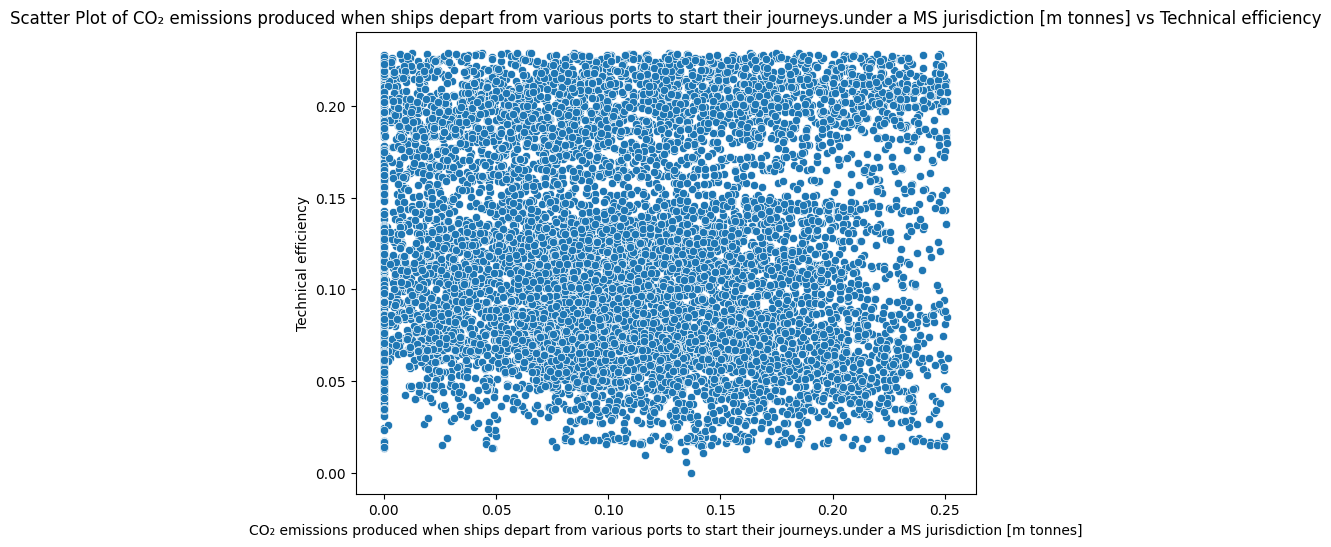

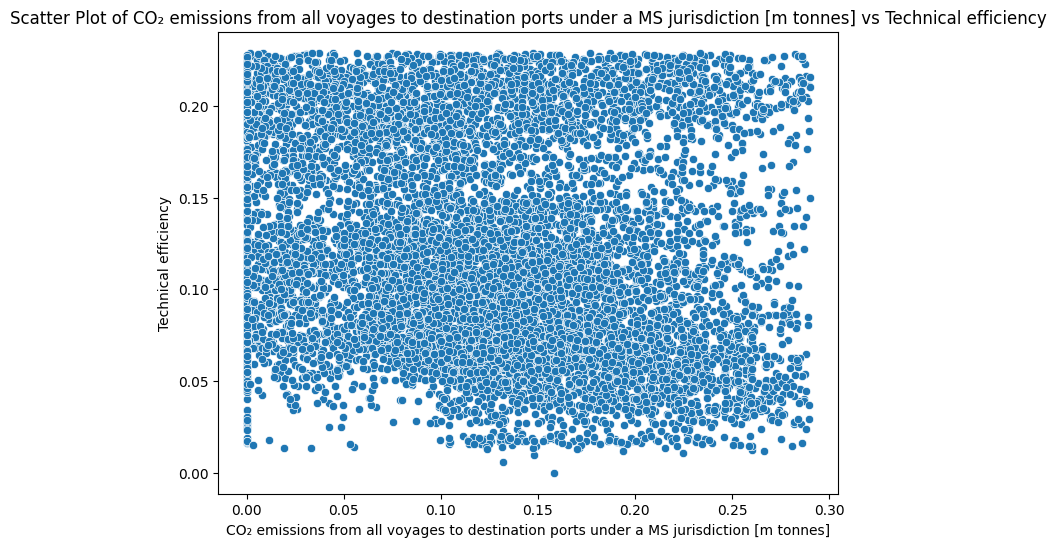

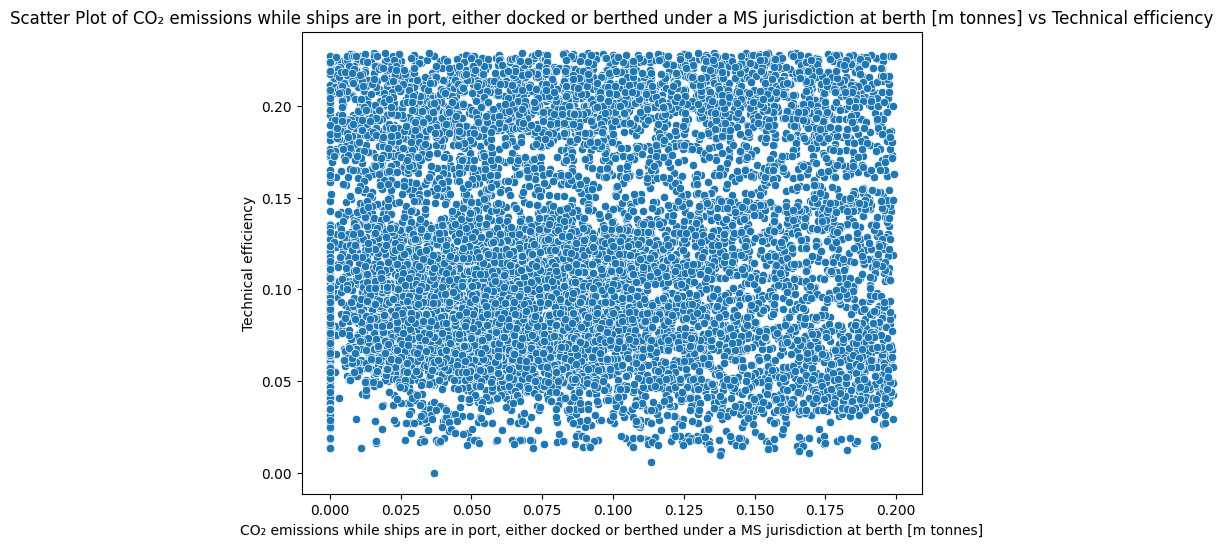

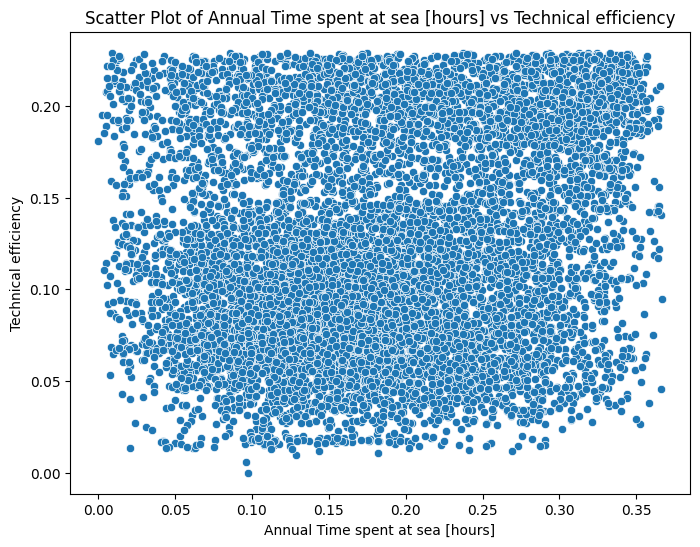

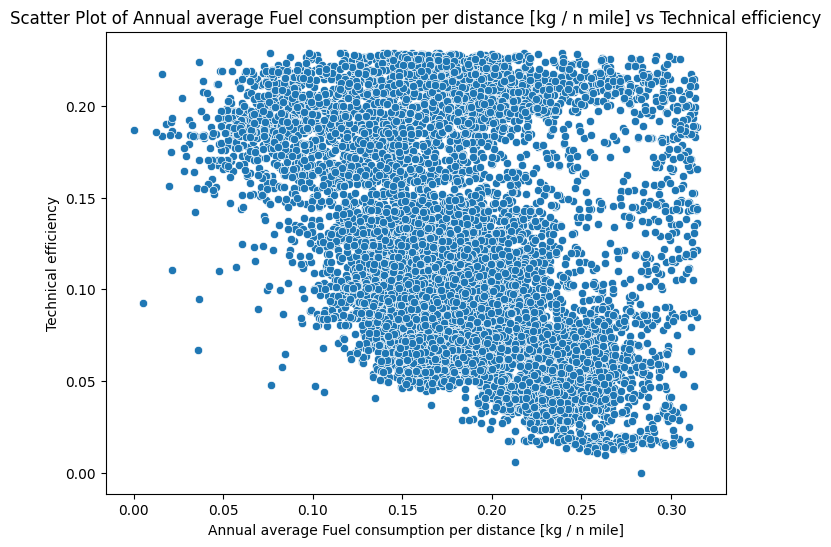

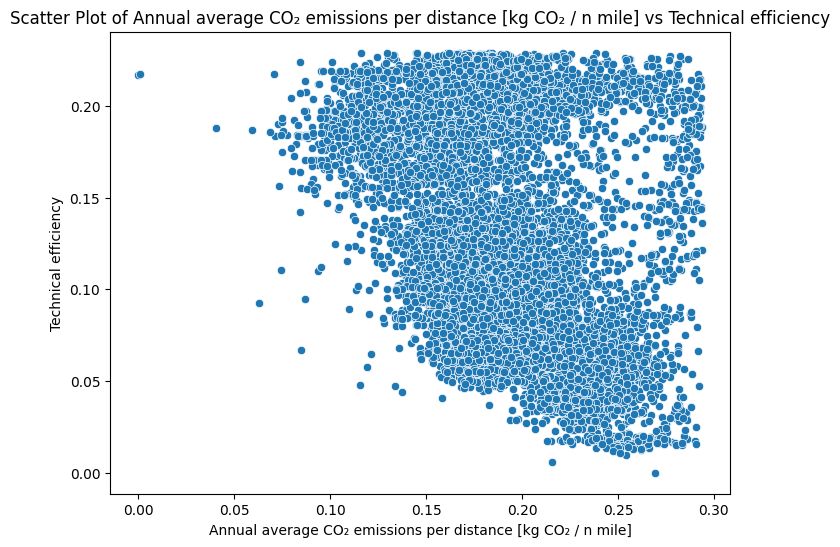

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate X1 and Y1 dataframes
df = pd.concat([X, Y], axis=1)

 #Plot scatter plots for each feature against the output column
for feature in X.columns:
     plt.figure(figsize=(8, 6))
     sns.scatterplot(data=df, x=feature, y='Technical efficiency')
     plt.title(f'Scatter Plot of {feature} vs Technical efficiency')
     plt.xlabel(feature)
     plt.ylabel('Technical efficiency')
     plt.show()


                                                    Ship type  \
Ship type                                            1.000000   
Total fuel consumption [m tonnes]                    0.229955   
Total CO₂ emissions [m tonnes]                       0.227741   
CO₂ emissions from all voyages between diffrene...   0.152047   
CO₂ emissions produced when ships depart from v...   0.190226   
CO₂ emissions from all voyages to destination p...   0.103735   
CO₂ emissions while ships are in port, either d...   0.258298   
Annual Time spent at sea [hours]                     0.147238   
Annual average Fuel consumption per distance [k...   0.117628   
Annual average CO₂ emissions per distance [kg C...   0.115619   
Technical efficiency                                 0.341963   

                                                    Total fuel consumption [m tonnes]  \
Ship type                                                                    0.229955   
Total fuel consumption [m tonnes]        

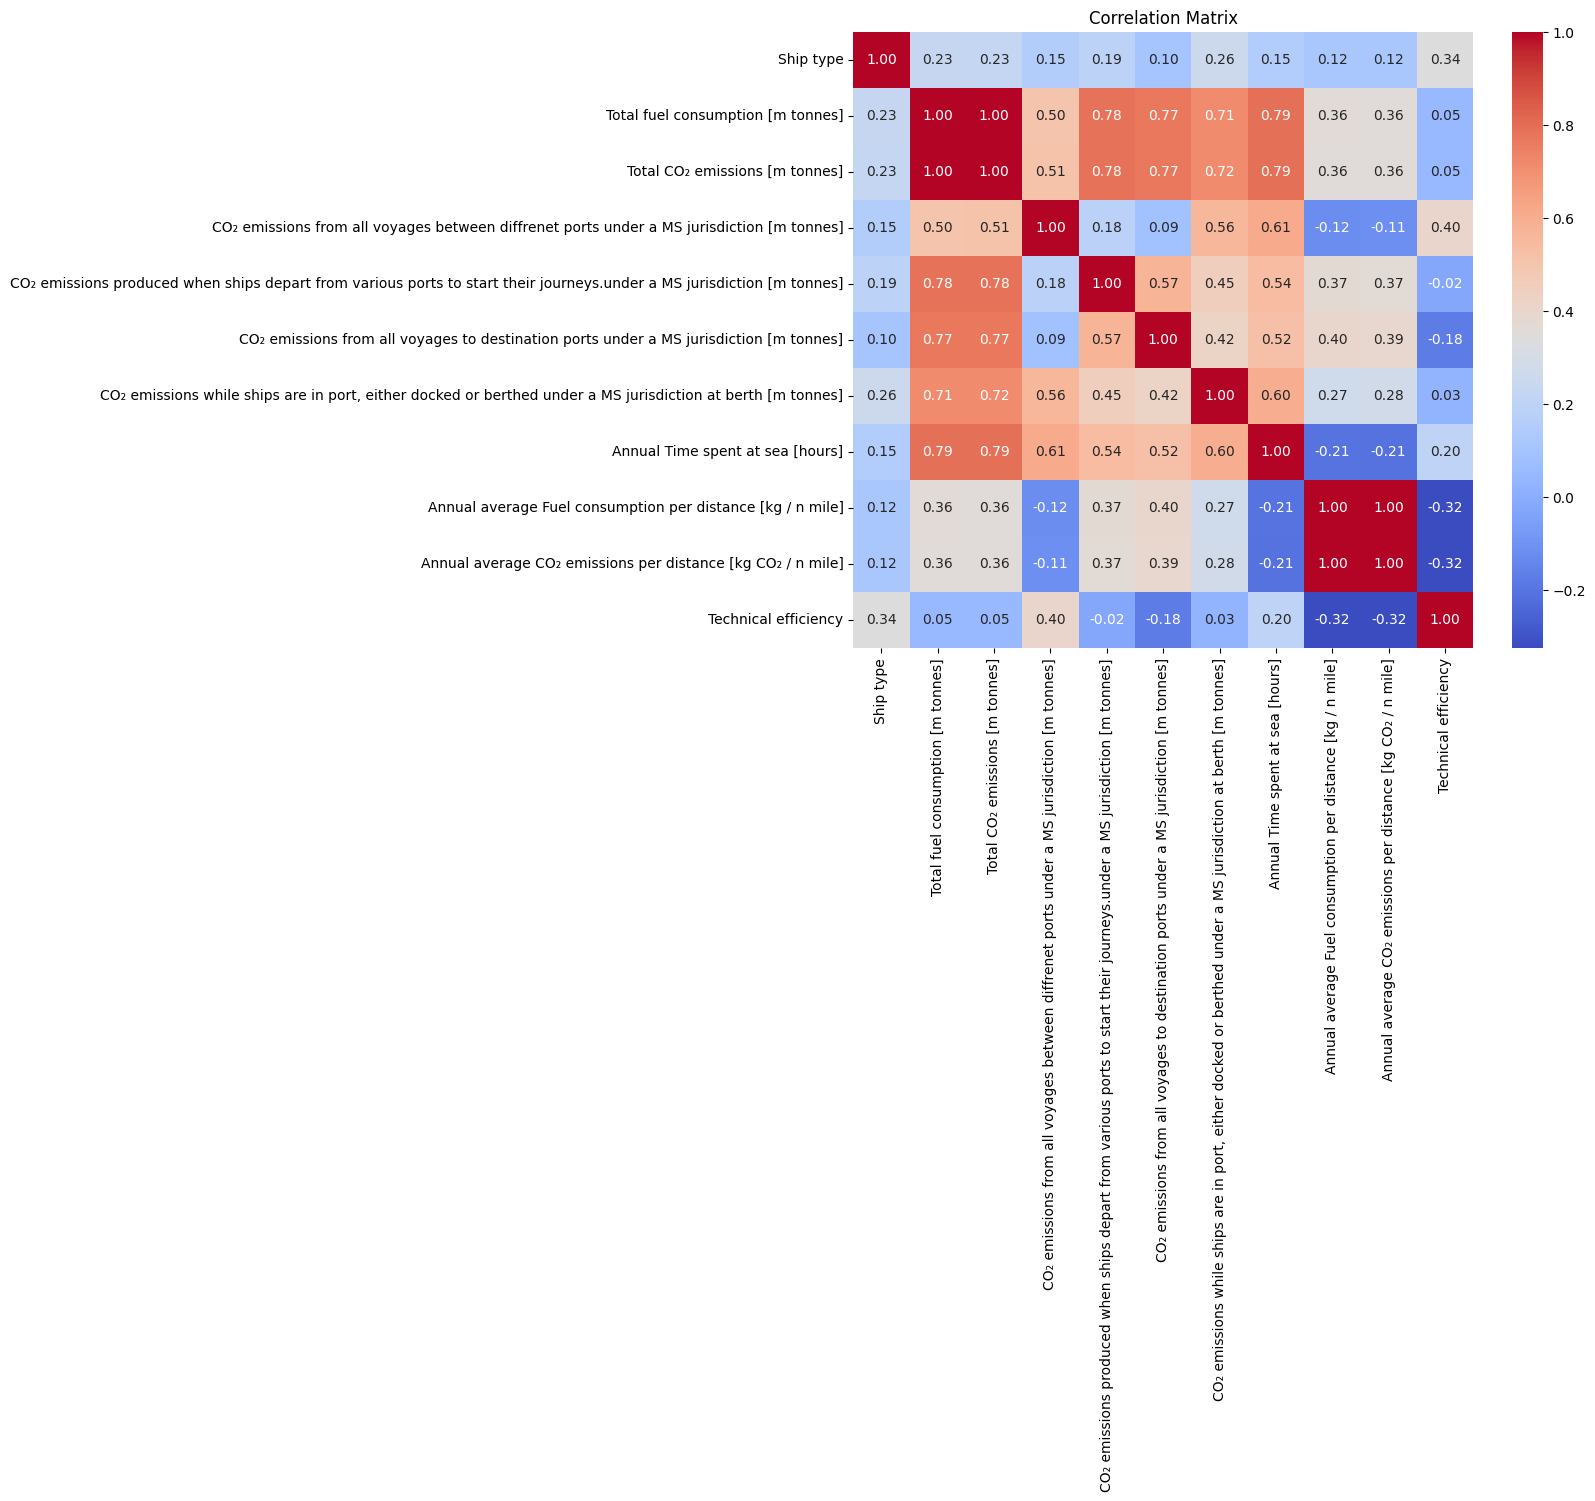

In [50]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Linear Regression:
MSE: 0.0019452234270368434
R^2: 0.43399009348150674
MSE_CV: 0.0019481346293116007
R^2_CV: 0.40646601676792393


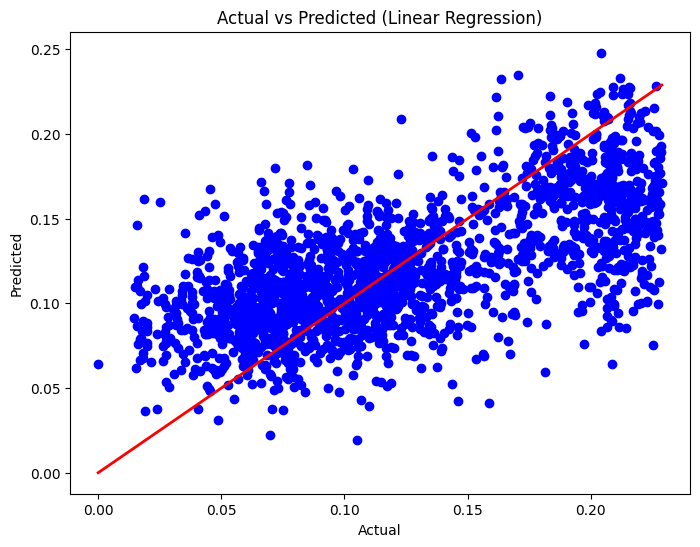

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# 1. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Cross-validation metrics
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

#mse_cv=mean_Squared_error(y_test,y_pred_cv)
print("Linear Regression:")
print("MSE:", mse)
print("R^2:", r2)
print("MSE_CV:", mse_cv)
print("R^2_CV:", r2_cv)
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()


Decision Tree Regression:
MSE: 0.0014458092204432582
R^2: 0.5793067622297536
MSE_CV: 0.0015153211985722687
R^2_CV: 0.5383303528758607


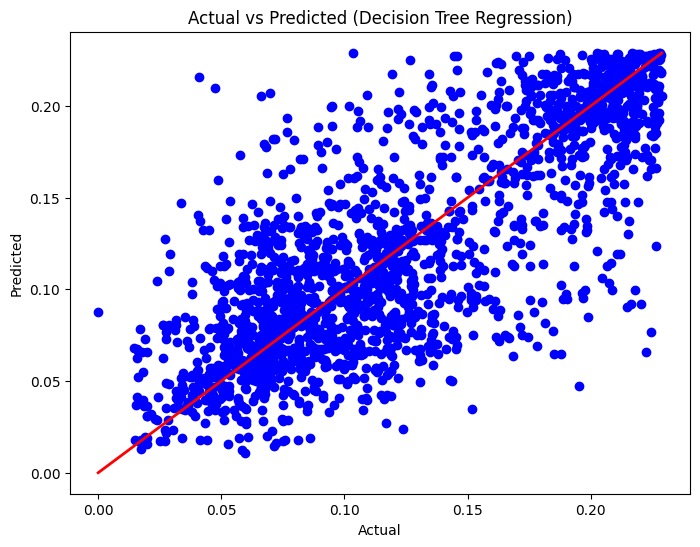

In [52]:
from sklearn.tree import DecisionTreeRegressor

# 2. Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation metrics
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print("Decision Tree Regression:")
print("MSE:", mse)
print("R^2:", r2)
print("MSE_CV:", mse_cv)
print("R^2_CV:", r2_cv)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Decision Tree Regression)')
plt.show()


K-Nearest Neighbors Regression:
MSE: 0.0009527820312758887
R^2: 0.7227649734424304
MSE_CV: 0.0009544494693436717
R^2_CV: 0.7092099350785266


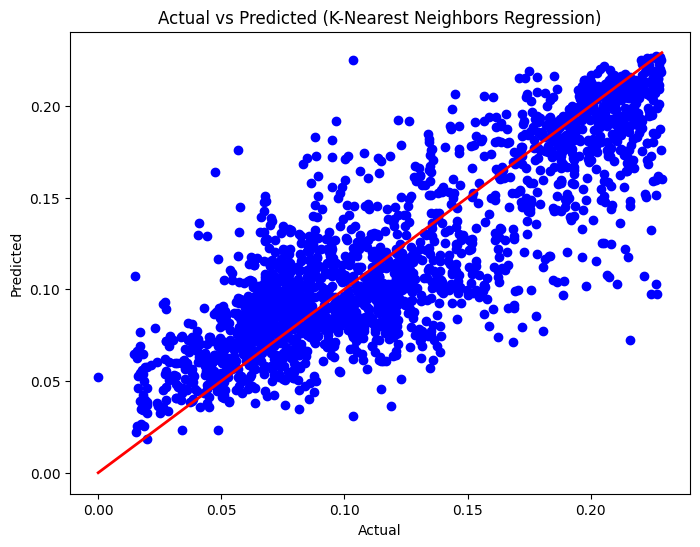

In [53]:
from sklearn.neighbors import KNeighborsRegressor

# 3. K-Nearest Neighbors Regression
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation metrics
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print("K-Nearest Neighbors Regression:")
print("MSE:", mse)
print("R^2:", r2)
print("MSE_CV:", mse_cv)
print("R^2_CV:", r2_cv)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (K-Nearest Neighbors Regression)')
plt.show()


Gradient Boosting Regression:
MSE: 0.0008080496851943309
R^2: 0.7648783577134667
MSE_CV: 0.0008246314450610398
R^2_CV: 0.7487613130420794


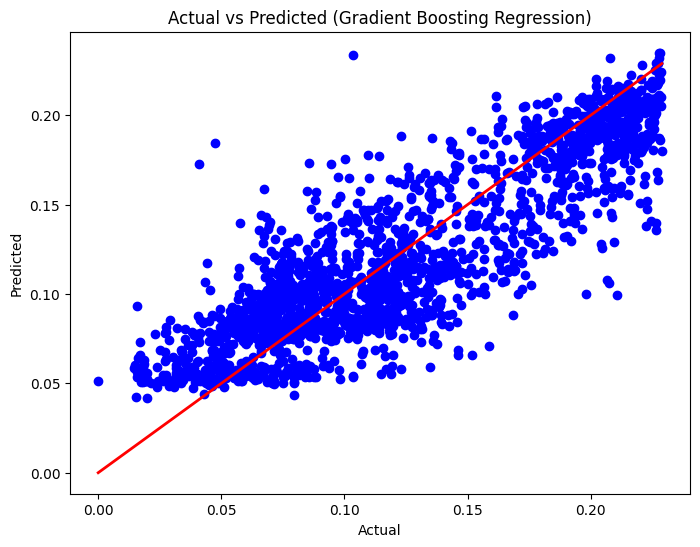

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# 4. Gradient Boosting Regression
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation metrics
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print("Gradient Boosting Regression:")
print("MSE:", mse)
print("R^2:", r2)
print("MSE_CV:", mse_cv)
print("R^2_CV:", r2_cv)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Gradient Boosting Regression)')
plt.show()


Random Forest Regression:
MSE: 0.0007821799800633079
R^2: 0.7724057754791349
MSE_CV: 0.00079796348876279
R^2_CV: 0.7568861818720906


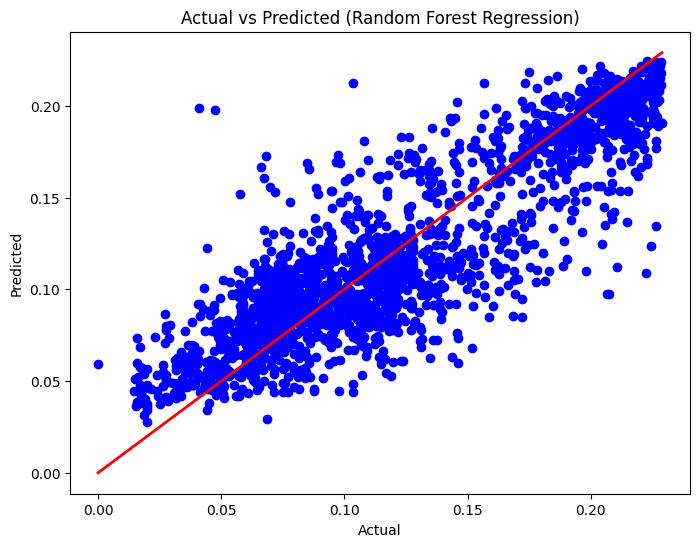

In [55]:
from sklearn.ensemble import RandomForestRegressor

# 5. Random Forest Regression
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation metrics
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print("Random Forest Regression:")
print("MSE:", mse)
print("R^2:", r2)
print("MSE_CV:", mse_cv)
print("R^2_CV:", r2_cv)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Random Forest Regression)')
plt.show()
